In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

import math

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from collections import defaultdict
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import keras
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import re
#from sentiment_utils import *
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
np.random.seed(1)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.3 MB 3.4 kB/s 
     |████████████████████████████████| 3.0 MB 48.3 MB/s 
     |████████████████████████████████| 2.9 MB 36.3 MB/s 
     |████████████████████████████████| 454 kB 40.0 MB/s 
     |████████████████████████████████| 26.0 MB 160 kB/s 
     |████████████████████████████████| 152 kB 43.7 MB/s 
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.15.0
    Uninstalling google-auth-2.15.0:
      Successfully uninstalled google-auth-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
 

In [ ]:
data1 = pd.read_csv('new_train.csv')
print(data1.columns)
#x = data1['text']
#y = data1['emotion']
data1.head(10)

Index(['text', 'emotion'], dtype='object')


text   emotion
0                            i didnt feel humiliated   sadness
1  i can go from feeling so hopeless to so damned...   sadness
2   im grabbing a minute to post i feel greedy wrong     anger
3  i am ever feeling nostalgic about the fireplac...      love
4                               i am feeling grouchy     anger
5  ive been feeling a little burdened lately wasn...   sadness
6  ive been taking or milligrams or times recomme...  surprise
7  i feel as confused about life as a teenager or...      fear
8  i have been with petronas for years i feel tha...       joy
9                                i feel romantic too      love

In [ ]:
data1.emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
print(data1.shape)
data1 = data1.dropna()
print(data1.shape)

(16000, 2)
(16000, 2)


In [ ]:
#preprocessing
data1['new_searchhistory'] = data1['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data1['new_searchhistory'].head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: new_searchhistory, dtype: object

In [ ]:
#remove punctuation
data1['new_searchhistory'] = data1['new_searchhistory'].str.replace('[^\w\s]','')
data1['new_searchhistory'].head()


<ipython-input-74-1ca67ed92cb9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data1['new_searchhistory'] = data1['new_searchhistory'].str.replace('[^\w\s]','')


0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: new_searchhistory, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#remove stopwords
stop = stopwords.words('english')
data1['new_searchhistory'] = data1['new_searchhistory'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data1.head(20)

text   emotion  \
0                             i didnt feel humiliated   sadness   
1   i can go from feeling so hopeless to so damned...   sadness   
2    im grabbing a minute to post i feel greedy wrong     anger   
3   i am ever feeling nostalgic about the fireplac...      love   
4                                i am feeling grouchy     anger   
5   ive been feeling a little burdened lately wasn...   sadness   
6   ive been taking or milligrams or times recomme...  surprise   
7   i feel as confused about life as a teenager or...      fear   
8   i have been with petronas for years i feel tha...       joy   
9                                 i feel romantic too      love   
10  i feel like i have to make the suffering i m s...   sadness   
11  i do feel that running is a divine experience ...       joy   
12  i think it s the easiest time of year to feel ...     anger   
13                 i feel low energy i m just thirsty   sadness   
14  i have immense sympathy with the general point...       joy   
15    i do not feel reassured anxiety is on each side       joy   
16               i didnt really feel that embarrassed   sadness   
17            i feel pretty pathetic most of the time   sadness   
18  i started feeling sentimental about dolls i ha...   sadness   
19  i now feel compromised and skeptical of the va...      fear   

                                    new_searchhistory  
0                               didnt feel humiliated  
1   go feeling hopeless damned hopeful around some...  
2           im grabbing minute post feel greedy wrong  
3   ever feeling nostalgic fireplace know still pr...  
4                                     feeling grouchy  
5       ive feeling little burdened lately wasnt sure  
6   ive taking milligrams times recommended amount...  
7      feel confused life teenager jaded year old man  
8   petronas years feel petronas performed well ma...  
9                                       feel romantic  
10     feel like make suffering seeing mean something  
11  feel running divine experience expect type spi...  
12          think easiest time year feel dissatisfied  
13                            feel low energy thirsty  
14  immense sympathy general point possible proto ...  
15                        feel reassured anxiety side  
16                      didnt really feel embarrassed  
17                          feel pretty pathetic time  
18  started feeling sentimental dolls child began ...  
19  feel compromised skeptical value every unit wo...

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
#lemmatization
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
data1['new_searchhistory']= data1['new_searchhistory'].apply(space)
data1.head(20)

text   emotion  \
0                             i didnt feel humiliated   sadness   
1   i can go from feeling so hopeless to so damned...   sadness   
2    im grabbing a minute to post i feel greedy wrong     anger   
3   i am ever feeling nostalgic about the fireplac...      love   
4                                i am feeling grouchy     anger   
5   ive been feeling a little burdened lately wasn...   sadness   
6   ive been taking or milligrams or times recomme...  surprise   
7   i feel as confused about life as a teenager or...      fear   
8   i have been with petronas for years i feel tha...       joy   
9                                 i feel romantic too      love   
10  i feel like i have to make the suffering i m s...   sadness   
11  i do feel that running is a divine experience ...       joy   
12  i think it s the easiest time of year to feel ...     anger   
13                 i feel low energy i m just thirsty   sadness   
14  i have immense sympathy with the general point...       joy   
15    i do not feel reassured anxiety is on each side       joy   
16               i didnt really feel that embarrassed   sadness   
17            i feel pretty pathetic most of the time   sadness   
18  i started feeling sentimental about dolls i ha...   sadness   
19  i now feel compromised and skeptical of the va...      fear   

                                    new_searchhistory  
0                               do not feel humiliate  
1   go feel hopeless damn hopeful around someone c...  
2              I m grab minute post feel greedy wrong  
3   ever feel nostalgic fireplace know still property  
4                                        feel grouchy  
5          I ve feel little burden lately be not sure  
6   I ve take milligram time recommend amount I ve...  
7       feel confused life teenager jade year old man  
8   petronas year feel petrona perform well make h...  
9                                       feel romantic  
10        feel like make suffering see mean something  
11  feel run divine experience expect type spiritu...  
12             think easy time year feel dissatisfied  
13                            feel low energy thirsty  
14  immense sympathy general point possible proto ...  
15                         feel reassure anxiety side  
16                     do not really feel embarrassed  
17                          feel pretty pathetic time  
18  start feel sentimental doll child begin collec...  
19  feel compromise skeptical value every unit wor...

In [ ]:
data1['emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

In [ ]:
def preprocessing(df):
  data1['new_searchhistory'] = data1['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
  data1['new_searchhistory'].head()
  #remove punctuation
  data1['new_searchhistory'] = data1['new_searchhistory'].str.replace('[^\w\s]','')
  print(data1['new_searchhistory'].head())
  #remove stopwords
  stop = stopwords.words('english')
  data1['new_searchhistory'] = data1['new_searchhistory'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  data1.head(20)

Split the Data into Training and Testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(data1['new_searchhistory'], data1['emotion'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (12000,) (12000,) Test:  ((4000,), (4000,))


TFIDF VECTORIZER

In [ ]:
print("TFIDF Vectorizer……")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


SVM

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(tf_x_train,Y_train)
y_test_pred=clf.predict(tf_x_test)
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)
confusion_matrix(Y_test, y_test_pred)
print(classification_report(Y_test, y_test_pred,zero_division=0))

              precision    recall  f1-score   support

       anger       0.89      0.84      0.86       545
        fear       0.88      0.84      0.86       479
         joy       0.86      0.93      0.89      1322
        love       0.81      0.66      0.73       342
     sadness       0.89      0.92      0.90      1154
    surprise       0.83      0.72      0.77       158

    accuracy                           0.87      4000
   macro avg       0.86      0.82      0.84      4000
weighted avg       0.87      0.87      0.87      4000



LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(tf_x_train,Y_train)
y_test_pred=model.predict(tf_x_test)
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)
confusion_matrix(Y_test, y_test_pred)
print(classification_report(Y_test, y_test_pred,zero_division=0))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       anger       0.91      0.75      0.82       545
        fear       0.88      0.73      0.80       479
         joy       0.78      0.95      0.85      1322
        love       0.87      0.52      0.65       342
     sadness       0.84      0.91      0.87      1154
    surprise       0.90      0.46      0.61       158

    accuracy                           0.83      4000
   macro avg       0.86      0.72      0.77      4000
weighted avg       0.84      0.83      0.82      4000



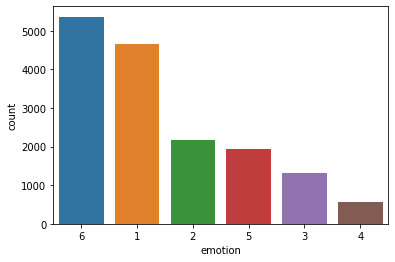

In [ ]:
data1['emotion'] = data1['emotion'].map({'sadness':1,'anger':2,'love':3,'surprise':4, 'fear':5,'joy':6},na_action = None)
count=sns.countplot(data= data1, x= 'emotion',order = data1['emotion'].value_counts().index)
plt.show()